![](https://images.squarespace-cdn.com/content/v1/55498133e4b0f65d7d6e1c4a/1539895492184-T982116JOKNIGZ7YEVO8/ke17ZwdGBToddI8pDm48kJK4Mm1kch8SFO9ZNkN1NT97gQa3H78H3Y0txjaiv_0fDoOvxcdMmMKkDsyUqMSsMWxHk725yiiHCCLfrh8O1z5QHyNOqBUUEtDDsRWrJLTmFk_H6M1tkD9NpL7mXac0oVSXdFfjxR5AjcLwGSebOiGBsFzzcw3xKxvyC_6CFFG_/Data+Science+Workflow.jpg)

# Ensemble learning
# Hybrid learning

$$Error = bias^{2} + variance + \text{irreducible error} $$

![](https://miro.medium.com/max/544/1*Y-yJiR0FzMgchPA-Fm5c1Q.jpeg)

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/08/Copy-of-Add-a-subheading5.png)

![](https://miro.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png)

### Ensemble learning
- Bagging: boostrap aggregation --> reduce bias
- Boosting --> reduce variance
- Stacking

![](https://miro.medium.com/max/2400/1*fFkYxzzaD7LsAorKeQgWcQ.png)

![](https://miro.medium.com/max/2400/1*lv3F3ykaRo4UeEGRuqjoYA.png)

![](https://miro.medium.com/max/2400/1*3XM6lry8z0768UM7h0J3-A.png)

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

# Probability of default: credit scoring model

This model uses a Kaggle dataset containing data about credit repayment difficulty rates among customers.

**Kaggle description:**

Improve on the state of the art in credit scoring by predicting the probability that somebody will experience financial distress in the next two years. 

Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

The goal of this competition is to build a model that borrowers can use to help make the best financial decisions.

Historical data are provided on 250,000 borrowers.

---

The variables are the following:

**SeriousDlqin2yrs** Person experienced 90 days past due delinquency or worse (Target variable / label)

**RevolvingUtilizationOfUnsecuredLines**: Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits

**age** Age of borrower in years

**NumberOfTime30-59DaysPastDueNotWorse**: Number of times borrower has been 30-59 days past due but no worse in the last 2 years.

**DebtRatio**: Monthly debt payments, alimony,living costs divided by monthy gross income

**MonthlyIncome**: Monthly income

**NumberOfOpenCreditLinesAndLoans**: Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)

**NumberOfTimes90DaysLate**: Number of times borrower has been 90 days or more past due.

**NumberRealEstateLoansOrLines**: Number of mortgage and real estate loans including home equity lines of credit

**NumberOfTime60-89DaysPastDueNotWorse**: Number of times borrower has been 60-89 days past due but no worse in the last 2 years.

**NumberOfDependents**: Number of dependents in family excluding themselves (spouse, children etc.)

---

We will be using a random forest classifier for two reasons: firstly, because it would allow us to quickly and easily change the output to a simple binary classification problem. Secondly, because the predict_proba functionality allows us to output a probability score (probability of 1), this score is what we will use for predicting the probability of 90 days past due delinquency or worse in 2 years time.

---

Furthermore, we will predominantly be adopting a quantiles based approach in order to streamline the process as much as possible so that hypothetical credit checks can be returned as easily and as quickly as possible.


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, \
AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [28]:
df = pd.read_csv('/Users/nguyen_truong/Desktop/cs-training.csv', index_col=0)
df.head(2)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0


## 1. Cleaning

In [47]:
df.isna().sum() / df.shape[0] * 100

SeriousDlqin2yrs                         0.000000
RevolvingUtilizationOfUnsecuredLines     0.000000
age                                      0.000000
NumberOfTime30-59DaysPastDueNotWorse     0.000000
DebtRatio                                0.000000
MonthlyIncome                           19.820667
NumberOfOpenCreditLinesAndLoans          0.000000
NumberOfTimes90DaysLate                  0.000000
NumberRealEstateLoansOrLines             0.000000
NumberOfTime60-89DaysPastDueNotWorse     0.000000
NumberOfDependents                       2.616000
dtype: float64

In [48]:
type(df)

pandas.core.frame.DataFrame

In [49]:
type(df['MonthlyIncome'])

pandas.core.series.Series

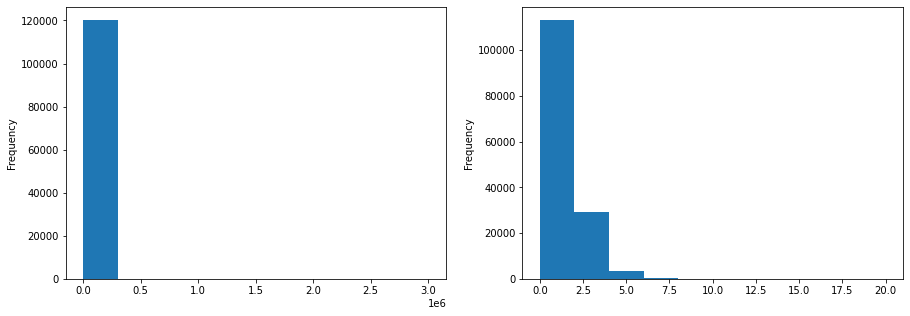

In [50]:
# Before fill na
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

df['MonthlyIncome'].plot(kind='hist', ax=axes[0], xlabel='MonthlyIncome')
df['NumberOfDependents'].plot(kind='hist', ax=axes[1], xlabel='NumberOfDependents');

In [51]:
df['MonthlyIncome'] = df.MonthlyIncome.fillna(df.MonthlyIncome.median())
df['NumberOfDependents'] = df.NumberOfDependents.fillna(df.NumberOfDependents.median())

In [11]:
df.isna().sum() / df.shape[0] * 100

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

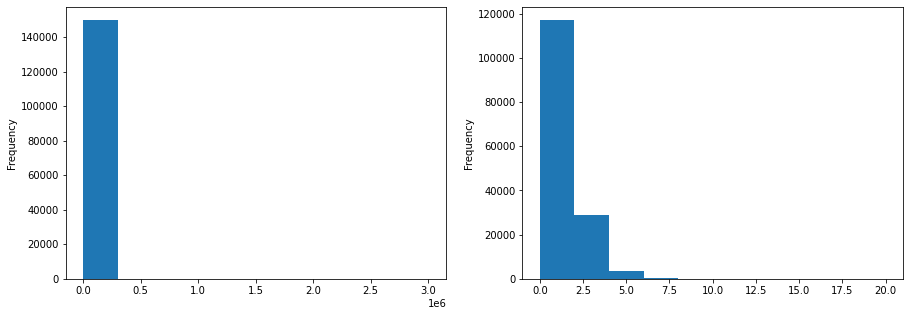

In [12]:
# Before fill na
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

df['MonthlyIncome'].plot(kind='hist', ax=axes[0], xlabel='MonthlyIncome')
df['NumberOfDependents'].plot(kind='hist', ax=axes[1], xlabel='NumberOfDependents');

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         150000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    150000 non-null  float64
dtype

In [14]:
df.duplicated().sum()

767

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

0

In [17]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149233.000000,149233.000000,149233.000000,149233.000000,149233.000000,1.492330e+05,149233.000000,149233.000000,149233.000000,149233.000000,149233.000000
mean,0.067036,6.077045,52.298145,0.388386,354.808254,6.426774e+03,8.488082,0.232435,1.023473,0.206811,0.741177
std,0.250085,250.396053,14.714050,3.779712,2042.891693,1.292246e+04,5.134233,3.752133,1.130304,3.736132,1.108596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030210,41.000000,0.000000,0.178098,3.900000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154285,52.000000,0.000000,0.368578,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.555959,63.000000,0.000000,0.877090,7.409000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


## 2. Exploration

In [18]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [19]:
df.groupby('SeriousDlqin2yrs')['SeriousDlqin2yrs'].count()

SeriousDlqin2yrs
0    139229
1     10004
Name: SeriousDlqin2yrs, dtype: int64

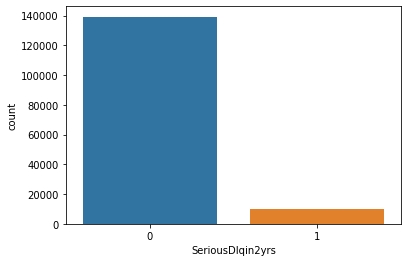

In [20]:
sns.countplot(data=df, x='SeriousDlqin2yrs');


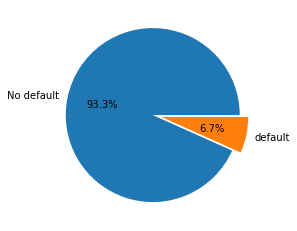

In [21]:
plt.pie(x=df.groupby('SeriousDlqin2yrs')['SeriousDlqin2yrs'].count().values, explode=(0, 0.1), 
        labels=['No default', 'default'], autopct='%.1f%%');

In [22]:
df.groupby('SeriousDlqin2yrs')[['RevolvingUtilizationOfUnsecuredLines', 'MonthlyIncome', 
                               'DebtRatio', 'age']].agg(['mean', 'min', 'median', 'max'])

RevolvingUtilizationOfUnsecuredLines                          \
                                                 mean  min    median      max   
SeriousDlqin2yrs                                                                
0                                            6.199365  0.0  0.133433  50708.0   
1                                            4.374687  0.0  0.837421   8328.0   

                 MonthlyIncome                           DebtRatio       \
                          mean  min  median        max        mean  min   
SeriousDlqin2yrs                                                          
0                  6486.625215  0.0  5400.0  3008750.0  359.050473  0.0   
1                  5593.804178  0.0  5222.5   250000.0  295.767874  0.0   

                                            age                  
                    median       max       mean min median  max  
SeriousDlqin2yrs                                                 
0                 0.364808  329664.0  52.753966   0   52.0  109  
1                 0.429075   38793.0  45.954318  21   45.5  101

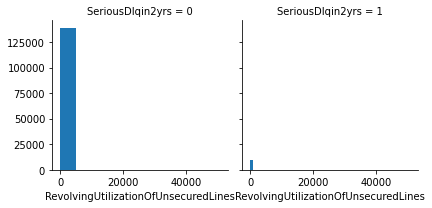

In [23]:
g = sns.FacetGrid(col='SeriousDlqin2yrs', data=df)
g.map(plt.hist, 'RevolvingUtilizationOfUnsecuredLines');

In [24]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [25]:
overdue = df.groupby('SeriousDlqin2yrs')[['NumberOfTime30-59DaysPastDueNotWorse', 
                                'NumberOfTime60-89DaysPastDueNotWorse',
                               'NumberOfTimes90DaysLate']].mean()
overdue

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
SeriousDlqin2yrs,,,
0,0.254854,0.100590,0.109101
1,2.246801,1.685126,1.948920


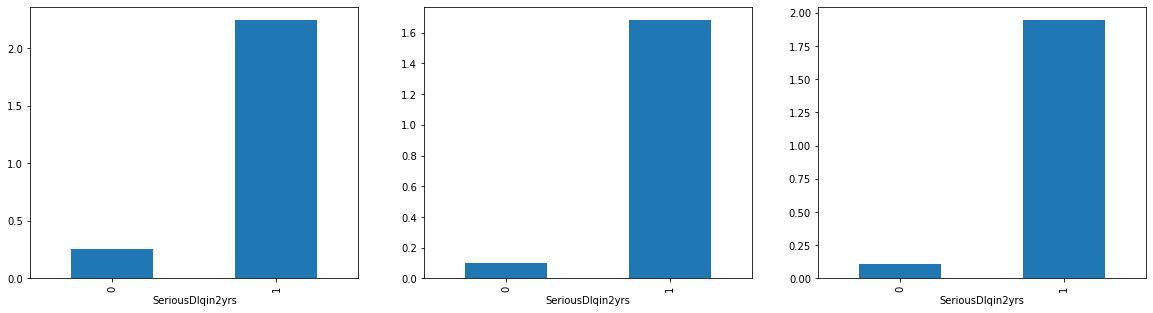

In [26]:
_, axes = plt.subplots(1, 3, figsize=(20, 5))

overdue['NumberOfTime30-59DaysPastDueNotWorse'].plot(kind='bar', ax=axes[0])
overdue['NumberOfTime60-89DaysPastDueNotWorse'].plot(kind='bar', ax=axes[1])
overdue['NumberOfTimes90DaysLate'].plot(kind='bar', ax=axes[2]);

In [29]:
df[['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 
    'NumberOfTimes90DaysLate']].corr()

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
NumberOfTime30-59DaysPastDueNotWorse,1.000000,0.987005,0.983603
NumberOfTime60-89DaysPastDueNotWorse,0.987005,1.000000,0.992796
NumberOfTimes90DaysLate,0.983603,0.992796,1.000000


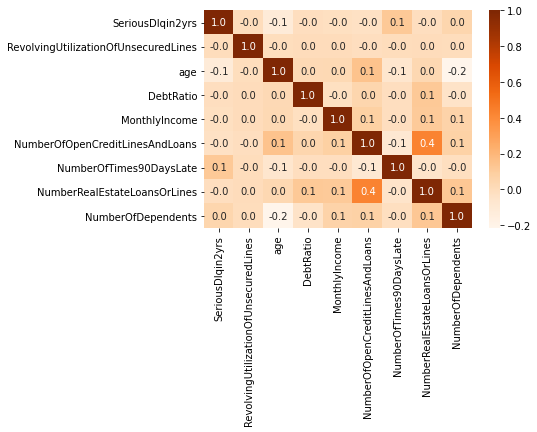

In [52]:
columns = ['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
           'NumberOfDependents']
sns.heatmap(df[columns].corr(), annot=True, fmt='0.1f', cmap='Oranges');

In [53]:
new_df = df[columns].copy()

In [54]:
new_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.295207,353.005076,6.418455e+03,8.452760,0.265973,1.018240,0.737413
std,0.249746,249.755371,14.771866,2037.818523,1.289040e+04,5.145951,4.169304,1.129771,1.107021
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000
75%,0.000000,0.559046,63.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,1.000000
max,1.000000,50708.000000,109.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,20.000000


## Normalization

- Normalization: MinMaxScaler --> [0, 1]
- Standardization: StandardScaler --> mean = 0, std = 1

$$\text{X}_{scaled} = \frac{X_{max} - X_i}{X_{max} - X_{min}}$$

$$\text{X}_{scaled} = \frac{X_i - \bar{X}}{\sigma}$$

In [64]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

In [55]:
scaler = MinMaxScaler()
new_df_arr = scaler.fit_transform(new_df)

In [56]:
new_df_arr.min(axis=0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [57]:
new_df_arr.max(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [45]:
new_df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfDependents'],
      dtype='object')

In [58]:
X_train, X_test, y_train, y_test = train_test_split(new_df_arr[:, 1:], new_df_arr[:, 0], test_size=0.15, 
                                                    shuffle=True, random_state=4)

In [61]:
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

In [70]:
algos = {'logit': LogisticRegression(), 
         'rf': RandomForestClassifier(), 
         'bayes': BernoulliNB(),
         'ada': AdaBoostClassifier(), 
         'knn': KNeighborsClassifier(),
        'gradient_boosting': GradientBoostingClassifier()}

In [71]:
evaluation = {}
for key in algos:
    ml = algos.get(key)
    ml.fit(X_train, y_train)
    evaluation.update({key: [recall_score(y_test, ml.predict(X_test)),
                            precision_score(y_test, ml.predict(X_test)),
                            f1_score(y_test, ml.predict(X_test)),
                            accuracy_score(y_test, ml.predict(X_test))]})

In [72]:
results = pd.DataFrame(evaluation, index=['recall', 'precision', 'f1', 'accuracy']) * 100
results

,logit,rf,bayes,ada,knn,gradient_boosting
recall,1.631854,14.556136,11.357702,13.054830,8.093995,13.315927
precision,53.191489,51.264368,44.050633,49.627792,43.205575,54.400000
f1,3.166561,22.674123,18.059159,20.671835,13.633865,21.394861
accuracy,93.204444,93.240000,92.982222,93.177778,93.017778,93.337778


In [79]:
thres = 0.6
np.where(ml.predict_proba(X_test)[:, 1] > thres, 1, 0).sum()

159

In [81]:
thres = 0.7
np.where(ml.predict_proba(X_test)[:, 1] > thres, 1, 0).sum()

31

In [84]:
thres = 0.6
print(classification_report(y_test, np.where(ml.predict_proba(X_test)[:, 1] > thres, 1, 0)))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     20968
         1.0       0.60      0.06      0.11      1532

    accuracy                           0.93     22500
   macro avg       0.77      0.53      0.54     22500
weighted avg       0.91      0.93      0.91     22500



In [85]:
thres = 0.7
print(classification_report(y_test, np.where(ml.predict_proba(X_test)[:, 1] > thres, 1, 0)))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97     20968
         1.0       0.71      0.01      0.03      1532

    accuracy                           0.93     22500
   macro avg       0.82      0.51      0.50     22500
weighted avg       0.92      0.93      0.90     22500



In [89]:
thres = 0.2
print(classification_report(y_test, np.where(ml.predict_proba(X_test)[:, 1] > thres, 1, 0)))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96     20968
         1.0       0.41      0.35      0.38      1532

    accuracy                           0.92     22500
   macro avg       0.68      0.65      0.67     22500
weighted avg       0.92      0.92      0.92     22500

